In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vega_datasets import data


pd.to_datetime('Jan 1 1970')



Timestamp('1970-01-01 00:00:00')

In [2]:
from vega_datasets import data


In [3]:
temps = data.sf_temps()


In [4]:
temps

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [5]:
# convert our date column to datetime type
temps.date = pd.to_datetime(temps.date)
temps.dtypes


temp           float64
date    datetime64[ns]
dtype: object

In [6]:
temps = temps.set_index('date').sort_index()
temps


,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


Resample by the day and take the average temperature.

In [15]:
tempy = temps.resample('1D').mean()
tempsmin = temps.resample('1D').min()
tempsmax = temps.resample('1D').max()
tempymonth = temps.resample('1M').mean()

In [8]:
tempsmin = temps.resample('1D').min()

Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

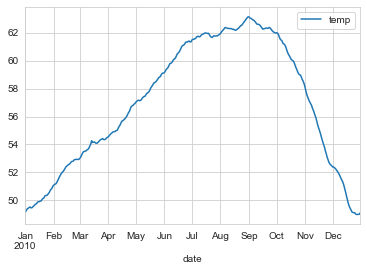

In [9]:
tempy.plot()

Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

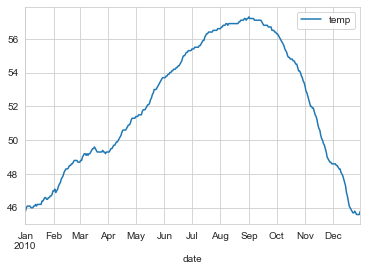

In [10]:
tempsmin.plot()

Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

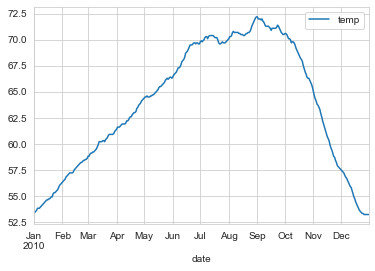

In [14]:
tempsmax.plot()

Which month is the coldest, on average?

<AxesSubplot:xlabel='date'>

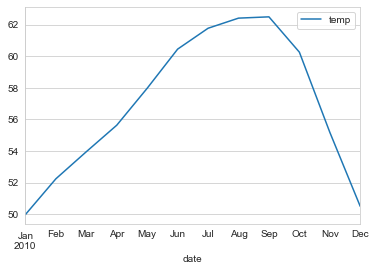

In [17]:
tempymonth.plot()
#january

Which month has the highest average temperature?

(<AxesSubplot:xlabel='date'>,
                  temp
 date                 
 2010-01-31  49.984140
 2010-02-28  52.243899
 2010-03-31  53.956528
 2010-04-30  55.633056
 2010-05-31  57.970968
 2010-06-30  60.444722
 2010-07-31  61.765457
 2010-08-31  62.405376
 2010-09-30  62.487083
 2010-10-31  60.253091
 2010-11-30  55.185139
 2010-12-31  50.498253)

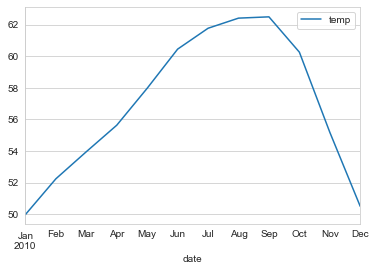

In [21]:
tempymonth.plot(), tempymonth
#September

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [29]:
tempyagg = temps.resample('1D').agg(['min','max']).temp

In [28]:
tempyagg

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [30]:
tempyagg['difference'] = tempyagg['max'] - tempyagg['min']

In [31]:
tempyagg

,min,max,difference
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [32]:
tempyagg_month = tempyagg.resample('1M').difference.mean()

In [34]:
tempyagg_month

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: difference, dtype: float64

September

part two:

In [35]:
SW = data.seattle_weather()


In [56]:
SW

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [42]:
SW
SW.date = pd.to_datetime(SW.date)
SW = SW.set_index('date').sort_index()

Which year and month combination has the highest amount of precipitation?

December 2015

In [46]:
precip_plot = SW.resample('1M').precipitation.mean()

In [47]:
precip_plot

date
2012-01-31    5.590323
2012-02-29    3.182759
2012-03-31    5.903226
2012-04-30    2.270000
2012-05-31    1.683871
2012-06-30    2.503333
2012-07-31    0.848387
2012-08-31    0.000000
2012-09-30    0.030000
2012-10-31    5.493548
2012-11-30    7.016667
2012-12-31    5.612903
2013-01-31    3.409677
2013-02-28    1.439286
2013-03-31    2.248387
2013-04-30    4.986667
2013-05-31    1.951613
2013-06-30    1.103333
2013-07-31    0.000000
2013-08-31    1.109677
2013-09-30    5.226667
2013-10-31    1.264516
2013-11-30    3.210000
2013-12-31    1.367742
2014-01-31    3.032258
2014-02-28    5.542857
2014-03-31    7.741935
2014-04-30    3.536667
2014-05-31    2.580645
2014-06-30    0.626667
2014-07-31    0.632258
2014-08-31    1.483871
2014-09-30    1.890000
2014-10-31    5.532258
2014-11-30    4.103333
2014-12-31    3.929032
2015-01-31    3.000000
2015-02-28    4.792857
2015-03-31    3.661290
2015-04-30    1.720000
2015-05-31    0.477419
2015-06-30    0.196667
2015-07-31    0.074194
2015-0

Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

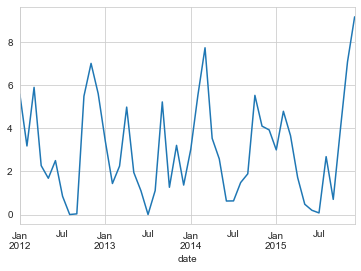

In [49]:
precip_plot.plot()

Visualize the amount of wind over time. Choose a time interval you think is appropriate. Which year-month combination is the windiest?

February 2014

In [51]:
wind_plot = SW.resample('1M').wind.mean()

<AxesSubplot:xlabel='date'>

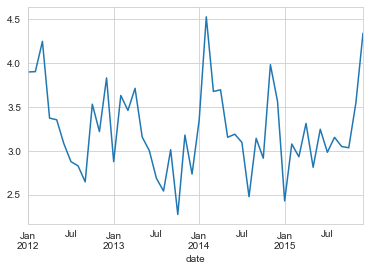

In [55]:
wind_plot.plot()

In [54]:
wind_plot

date
2012-01-31    3.900000
2012-02-29    3.903448
2012-03-31    4.248387
2012-04-30    3.373333
2012-05-31    3.354839
2012-06-30    3.083333
2012-07-31    2.877419
2012-08-31    2.829032
2012-09-30    2.646667
2012-10-31    3.532258
2012-11-30    3.220000
2012-12-31    3.832258
2013-01-31    2.877419
2013-02-28    3.632143
2013-03-31    3.461290
2013-04-30    3.713333
2013-05-31    3.158065
2013-06-30    3.003333
2013-07-31    2.687097
2013-08-31    2.541935
2013-09-30    3.013333
2013-10-31    2.274194
2013-11-30    3.180000
2013-12-31    2.735484
2014-01-31    3.348387
2014-02-28    4.528571
2014-03-31    3.677419
2014-04-30    3.696667
2014-05-31    3.154839
2014-06-30    3.190000
2014-07-31    3.096774
2014-08-31    2.477419
2014-09-30    3.143333
2014-10-31    2.916129
2014-11-30    3.983333
2014-12-31    3.564516
2015-01-31    2.429032
2015-02-28    3.078571
2015-03-31    2.932258
2015-04-30    3.313333
2015-05-31    2.812903
2015-06-30    3.246667
2015-07-31    2.983871
2015-0

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [62]:
sun_plot = SW.resample('1Y').weather.mean()

TypeError: Could not convert drizzlerainrainrainrainrainrainsunrainrainsunsunsunsnowsnowsnowsnowsnowsnowsnowrainrainrainrainrainraindrizzlerainrainrainrainrainsunsunsunsunsunrainrainrainrainrainrainrainraindrizzlerainrainrainsunrainrainrainsunrainrainsnowsunsnowsnowsunrainsunrainrainsnowsunsunrainrainrainsnowsnowrainsnowrainsnowrainrainrainrainrainsunsunraindrizzlerainrainrainrainrainrainsunrainsunsnowrainsunsunsunrainrainraindrizzlesunrainrainrainrainrainrainsunrainsunrainrainrainraindrizzlerainrainrainrainrainrainsunsunsunsunrainsunsunsunsunsundrizzlesunrainrainsunrainrainrainrainrainrainsunsunrainsunrainrainrainrainsunrainrainsunrainrainrainsunrainrainsunsunsunrainsunrainrainsunsunrainraindrizzlerainrainsunrainrainrainrainrainrainsundrizzlesunsunrainraindrizzlefogdrizzlerainrainrainrainsunsunsunrainsunrainrainsunsundrizzledrizzledrizzlesunsunsundrizzlesunsunsunsunraindrizzlesundrizzlesunsunsunsunsunsunsunsundrizzledrizzlesunrainsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunsunrainrainsunsunsunsunsunsunfogsundrizzledrizzledrizzlerainfogfogsundrizzledrizzlerainsunsunsunsunsunsunsunsunsunsundrizzledrizzledrizzlerainrainrainrainsunsunrainrainrainrainrainrainrainsunrainrainrainrainrainrainrainrainrainrainrainrainrainrainrainsunrainrainrainraindrizzlerainrainrainrainrainrainrainrainraindrizzlefogsunrainrainrainrainrainrainrainrainrainrainsunrainrainrainrainrainrainsnowsnowrainsnowsnowrainrainrainrainrainsnowrainrainrainraindrizzledrizzle to numeric

In [63]:
SW.resample('Y').weather.value_counts()
#2014-12-31

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

In which month does it rain the most


2015-12-31

In [69]:
SW.resample('M').precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

Which month has the most number of days with a non-zero amount of precipitation?

In [72]:
SW['did_rain'] = np.where(SW['precipitation'] == 0,0,1)

In [74]:
SW.resample('M').did_rain.sum().idxmax().strftime('$B, %Y')

'$B, 2012'

In [75]:
did_rain_df = pd.DataFrame(SW.resample('M').did_rain.sum())

In [77]:
did_rain_df.groupby('month').did_rain.sum().idxmax()cd

KeyError: 'month'